# The collapse of the Phillips Curve?

**Motivation for the project and relevans to economics**

This project is our data project where we create a Philips curve from historical data on inflation and employment in the US. In the 1960s the U.S. data showed a good correlation between unemplyment and inflation. However in the 1970s and onwards that relationship disappeared. We found it interesting to recreate the Philips curve from the 1960s with U.S. data but then also look at other periods in time to see if the correlation between inflation and unemployment has actually disappeared - this is not meant as a causal analysis, but just to explore an interesting concept that was widely belived to be true in the economics profession.

**Structure of the project**

To conduct our analysis, we utilize data sourced from both FRED and DST, covering inflation and unemployment rates for both the United States, Japan and Denmark. Our aim is to span the longest available time periods, hence we incorporate data from both sources to include Danish economic indicators.

We explore the dataset by first checking data is loaded correctly by pulling 10 random values to inspect, then we plot the individual dataset. We then perform the analysis plotting the rate of unemployment compared to the inflation rate and thereby creating the Phillips curve. At first we focus on the 

# Project setup

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# Getting data from API calls

## Getting U.S. Data (from FRED)

### Inflation U.S.

In [2]:
# Importing DataHelper to get data from API calls
import DataHelper

# Get data from API call
inflation_annual_US = DataHelper.inflation_annual_US()

# Display 10 random elements
#inflation_annual_US.head(10)

#### Descriptive statistics

<module 'matplotlib.pyplot' from 'c:\\Users\\BertilSpring\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

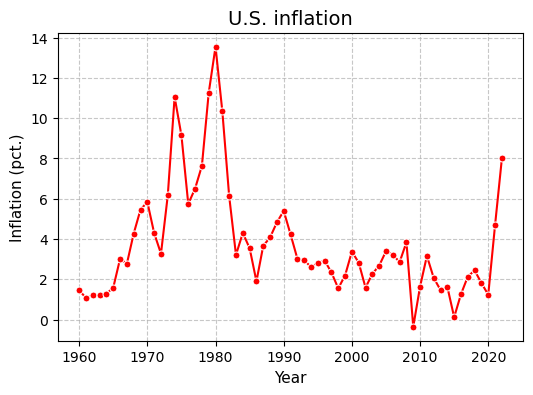

In [3]:
# Suppress FutureWarning about use_inf_as_na
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Importing the GraphHelper class to reuse the graph generating code
import GraphHelper

# Plot data
GraphHelper.line_plot_with_labels(
    inflation_annual_US, 
    "U.S. inflation", 
    "Year", 
    "Inflation (pct.)",
    "Year",
    "Inflation_US",
    color="red")

We notice an upward trend in the inflation rates in the period we focus on for our intitial assesment of the validity of the Phillips Curve between 1960 and 10 years forward. The trend is then descending for two years having a steep rise in the inflation rate in the middle of the 1970s. After reaching a rate of almost 14 pct. We observe another descend, We then observe that the curve exhibits minimal fluctuations between the mid-1980s and up to the year 2020.

### Unemployment U.S.

In [4]:
# Get data from API call
unemployment_annual_US = DataHelper.unemployment_annual_US()

# Display 10 random elements
#unemployment_annual_US.head(10)

#### Descriptive statistics

<module 'matplotlib.pyplot' from 'c:\\Users\\BertilSpring\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

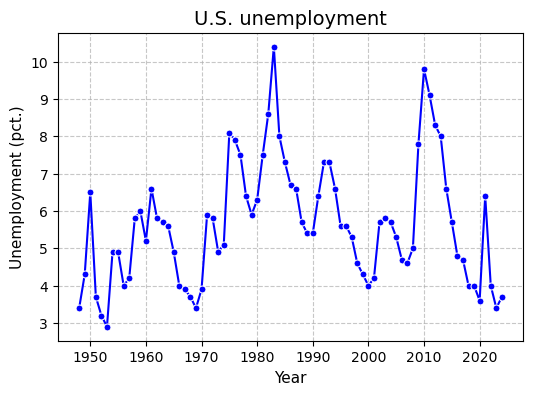

In [5]:
# Plot data
GraphHelper.line_plot_with_labels(
    unemployment_annual_US, 
    "U.S. unemployment", 
    "Year", 
    "Unemployment (pct.)",
    "Year",
    "Unemployment_US",
    color="blue")

The curve shows minor fluctuations between approximately 1950 and 1970. However, in the subsequent decades, certain years experience extremely high unemployment rates, notably in 1983, when the curve peaks at over 10 percent.

## Getting DK Data (from DST and FRED)

### Inflation DK

In [6]:
# Importing DataHelper to get data from API calls
import DataHelper

# Get inflation data from API call
inflation_annual_DK = DataHelper.inflation_annual_DK()

# Show 10 random elements
#inflation_annual_DK.sample(10)

#### Descriptive statistics

<module 'matplotlib.pyplot' from 'c:\\Users\\BertilSpring\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

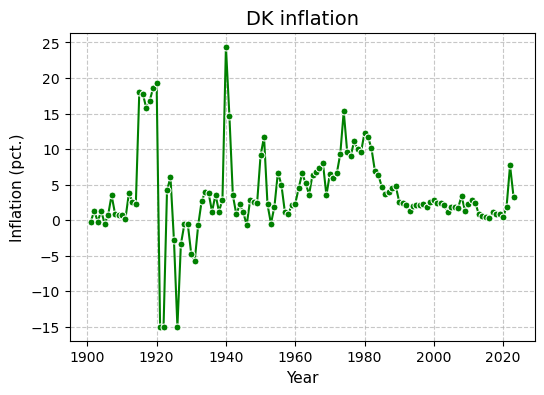

In [7]:
# Plot data
GraphHelper.line_plot_with_labels(
    inflation_annual_DK, 
    "DK inflation", 
    "Year", 
    "Inflation (pct.)",
    "Year",
    "Inflation_DK",
    color="green")

Focusing on the same period as shown for the U.S. Inflation(1960-2023) we see a quite similar development, except the inflation rate for this period peaks earlier in DK in around 1974.

### Unemployment DK


In [8]:
# Get inflation data from API call
unemployment_annual_DK = DataHelper.unemployment_annual_DK()

# Show 10 random elements
#unemployment_annual_DK.sample(10)

#### Descriptive statistics

<module 'matplotlib.pyplot' from 'c:\\Users\\BertilSpring\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

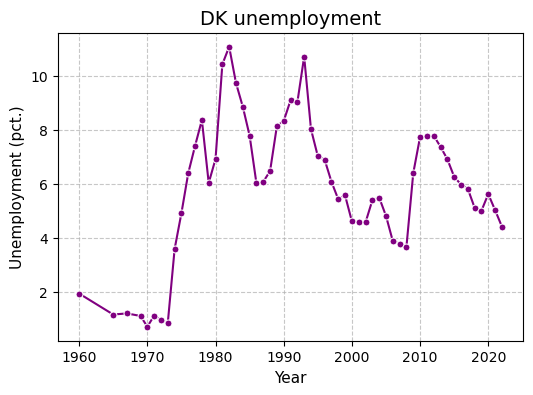

In [9]:
# Plot data
GraphHelper.line_plot_with_labels(
    unemployment_annual_DK, 
    "DK unemployment", 
    "Year", 
    "Unemployment (pct.)",
    "Year",
    "Unemployment_DK",
    color="purple")

According to this graph, Denmark had almost no fulltime unemployed individuals before 1973. However, from that year onward, the unemployment rate fluctuates between around 4 percent to almost 12 percent until the year 2000. Between 2000 and 2023, the unemployment rate remains between 4 percent to 8 percent

## Getting Japan Data (from FRED)

### Inflation Japan

In [10]:
# Getting unemployment rate from API call
inflation_annual_JPN = DataHelper.inflation_annual_JPN()

inflation_annual_JPN.sample(5)

,Year,Inflation_JPN
52,2012,-0.044065
39,1999,-0.341297
28,1988,0.678558
4,1964,3.800389
3,1963,6.706906


#### Descriptive statistics

<module 'matplotlib.pyplot' from 'c:\\Users\\BertilSpring\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

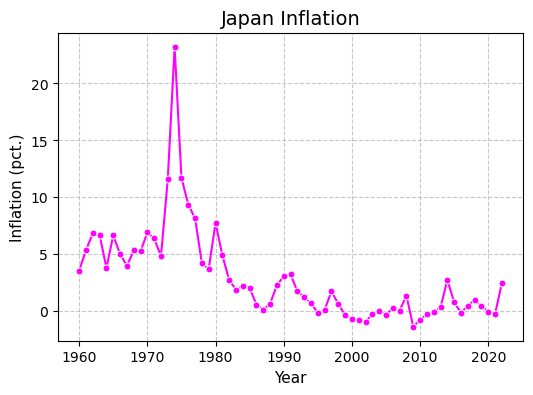

In [11]:
# Plot data
GraphHelper.line_plot_with_labels(
    inflation_annual_JPN, 
    "Japan Inflation", 
    "Year", 
    "Inflation (pct.)",
    "Year",
    "Inflation_JPN",
    color="magenta")

Just as observed in both the U.S. and DK graphs, there is a spike in the inflation rate around the mid-1970s, followed by a decline in the subsequent years. During this period, we also notice low fluctuations ranging between -2 percent to around 3 percent.

### Unemployment Japan

In [12]:
# Getting unemployment rate from API call
unemployment_annual_JPN = DataHelper.unemployment_annual_JPN()

unemployment_annual_JPN.sample(5)

,Year,Unemployment_JPN
38,1998,4.108333
22,1982,2.350000
32,1992,2.150000
23,1983,2.658333
6,1966,1.308333


#### Descriptive statistics

<module 'matplotlib.pyplot' from 'c:\\Users\\BertilSpring\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

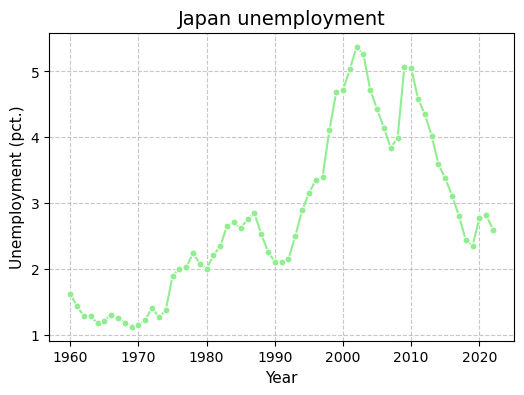

In [13]:
# Plot data
GraphHelper.line_plot_with_labels(
    unemployment_annual_JPN, 
    "Japan unemployment", 
    "Year", 
    "Unemployment (pct.)",
    "Year",
    "Unemployment_JPN",
    color="lightgreen")

In the years leading up to 1970, the unemployment rate was extremely low, similar to Denmark. However, after this point, we observe a steadily rising curve with brief periods of minor decreases up to the year 1990, and another decrease up to the year 2007.

# Merge datasets to one big dataset

### Merging and descriptive statistics

In [14]:
# Calling the merged data function
merged_df = DataHelper.merged_data()

# Showing a sample of the merged data df
merged_df.sample(5)

,Year,Inflation_US,Unemployment_US,Inflation_DK,Unemployment_DK,Inflation_JPN,Unemployment_JPN
50,2010,1.640043,9.8,2.3,7.747370,-0.728243,5.050000
38,1998,1.552279,4.6,1.8,5.442416,0.661974,4.108333
4,1964,1.278912,5.6,3.6,NaN,3.800389,1.175000
23,1983,3.212435,10.4,6.9,9.743647,1.899720,2.658333
46,2006,3.225944,4.7,1.9,3.896716,0.249355,4.141667


In [15]:
# Excluding year-column for purpose of summary statistics
columns_to_include = merged_df.iloc[:, 1:7]

# Formatting & displaying summary statistics for each country
statistics = columns_to_include.describe().style.format('{:.1f}')
display(statistics)

,Inflation_US,Unemployment_US,Inflation_DK,Unemployment_DK,Inflation_JPN,Unemployment_JPN
count,63.0,63.0,63.0,57.0,63.0,63.0
mean,3.8,5.9,4.5,5.8,2.9,2.8
std,2.8,1.6,3.5,2.6,4.1,1.3
min,-0.4,3.4,0.3,0.7,-1.4,1.1
25%,1.9,4.8,1.9,4.6,0.1,2.0
50%,3.0,5.7,2.9,6.0,1.8,2.6
75%,4.5,6.7,6.6,7.7,4.9,3.7
max,13.5,10.4,15.3,11.1,23.2,5.4


The above dataframe shows summary statistics for both inflation and unemployment in each of the three analyzed countries. Below follows a visualization of this table. <br> <br>
**Main points:**  <br>
    1) Unemployment data for Denmark only has 57 observations. In the 60's there are several years with missing observations <br>
    2) By mean, Japan has had the lowest inflation rate in the period and the lowest unemployment rate. Denmark's inflation rate has been the highest and USA's unemployment rate the highest <br>
    3) By standard deviation, US is the country with the lowest inflation-volatility and Japan the country with lowest unemployment-volatility. <br>
    4) By standard deviation, Japan has the highest inflation volatility while Denmark's unemployment has varied the most.<br>

In [16]:
# Creating function to call from widget
def _plot_boxplot(dataframe, column_name1, column_name2):

    # Calling the helper function plot_boxplots from the custom GraphHelper class
    GraphHelper.plot_boxplots(dataframe, column_name1, column_name2)

# Creating interactive widget for box plot
widgets.interact(_plot_boxplot, 
dataframe = widgets.fixed(merged_df), 
column_name1 = widgets.Dropdown(
    options=['Inflation_US', 'Unemployment_US', 'Inflation_DK', 'Unemployment_DK','Inflation_JPN','Unemployment_JPN'],
    value='Inflation_US',
    description='Left Plot'
),
column_name2=widgets.Dropdown(
    options=['Inflation_US', 'Unemployment_US', 'Inflation_DK', 'Unemployment_DK','Inflation_JPN','Unemployment_JPN'],
    value='Inflation_DK',
    description='Right Plot'
))

interactive(children=(Dropdown(description='Left Plot', options=('Inflation_US', 'Unemployment_US', 'Inflation…

<function __main__._plot_boxplot(dataframe, column_name1, column_name2)>

**What do the boxplots show** <br>

*Inflation_US - Inflation_DK - Inflation_JPN:* <br> USA has had lower (relative) inflation volatility. Even though the median inflation in the US is higher than in Japan, the IQR is smaller (IQR is measured as 3rd Quantile minus the 1st Quantile). When the difference between the 1st and 3rd Quantile is small, more observations are deemed as 'outliers' by the boxplot (red dots). In comparison, Japan and Denmark have both experienced larger inflation volatility leading to fewer observations being deemed as outliers. Japan is the country with the lowest median inflation in the period, while Denmark's median inflation has been the highest. 

*Unemployment_US - Unemployment_DK - Unemployment_JPN:* <br> First of all, it is seen that Denmark's and the US' unemployment has had almost and identical median in the analyzed period. In comparison, Japan's unemployment is at a structurally lower level. Both Japan's and USA's unemployment rate has, however, varied little in comparison to the variation in unemployment seen for Denmark. Summing up, one could say that Japan is characterized by low unemployment rates and little variability. USA is characterized by structurally higher unemployment rates, but also with little variability. Denmark, however, has had more varying unemployment rates, and the max. and min. unemployment rates for the three countries in the period can both be found in Denmark.

*Summing up:* <br>
**USA:** Low variability in both inflation and unemployment. Structurally higher unemployment rate than JPN (and DK). <br>
**Denmark:** High variability in both inflation and unemployment. <br>
**Japan:** Struturally lower inflation and unemployment rate. Low unemployment variability, high inflation variability.

# Phillips-Curve with U.S. Data from the 1960s

<module 'matplotlib.pyplot' from 'c:\\Users\\BertilSpring\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

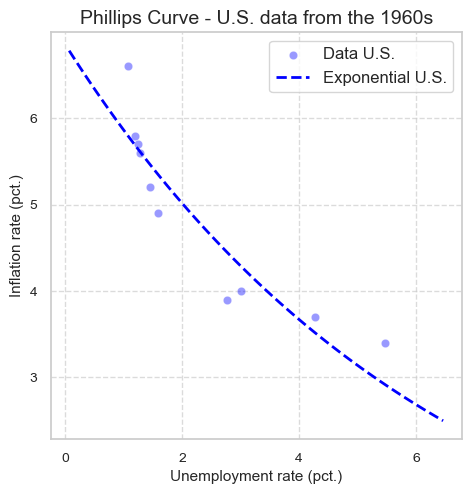

In [17]:
import GraphHelper

# Filter data for years between 1960 and 1970
philips_df_1960s = merged_df[(merged_df['Year'] < 1970)]
#merged_df.tail(20)

#Plot data
GraphHelper.plot_philips_curve_static(
    philips_df_1960s, 
    [("Inflation_US", "Unemployment_US")],
    "Phillips Curve - U.S. data from the 1960s",
    ["U.S."])

The above Phillips curve is created with U.S. data from the 1960s. It can be seen that there is a relationship between the inflation and the unemployment rate. However after the 1960s the Phillips curve started to break down and the correlation between the two variables disappeared. In the rest of this project we've created a bunch of interactive plots where the reader can see if there are any other points in history where there has been as clear a relationship between the inflation and the unemployment rate as in the 1960s.

# Trying to find the Phillips Curve in newer data

## Looking at the U.S. and Denmark in an interactive plot

The code below generates an interactive plot where it's possible to plot a Phillips-curve with data from different years. It's also possible to look at data from different countries - Denmark and the U.S. Beware that there are missing data for Denmark in the 1960s for some of the years, but not all of them.

In [18]:
# Implement an interactive Phillips Curve
def _plot_phillips_curve(dataframe, variable, years):

    # Filter observations where the year is not in the interval years
    dataframe = dataframe[dataframe['Year'] > years[0]]
    dataframe = dataframe[dataframe['Year'] < years[1]]

    # Switch like functionality to change country data
    xVariable = "Inflation_US"
    yVariable = "Unemployment_US"

    if variable == "U.S.":
        xVariable = "Inflation_US"
        yVariable = "Unemployment_US"
    elif variable == "Denmark":
        xVariable = "Inflation_DK"
        yVariable = "Unemployment_DK"
    elif variable == "Japan":
        xVariable = "Inflation_JPN"
        yVariable = "Unemployment_JPN"


    #Plot data
    GraphHelper.plot_philips_curve_static(
        dataframe, 
        [(xVariable, yVariable)],
        f"Phillips Curve - {variable} - ({years[0]} - {years[1]})",
        country_names=[variable])


widgets.interact(_plot_phillips_curve, 
dataframe = widgets.fixed(merged_df),
variable = widgets.Dropdown(
    description='Country', 
    options=['U.S.','Denmark', 'Japan'], 
    value='Denmark'),
years=widgets.IntRangeSlider(
    description="Years",
    min=1961,
    max=2022,
    value=[1980, 2010],
    continuous_update=False,
))

interactive(children=(Dropdown(description='Country', index=1, options=('U.S.', 'Denmark', 'Japan'), value='De…

<function __main__._plot_phillips_curve(dataframe, variable, years)>

Time Periods of interest:
US

DK

Japan

## Philips Curve over time

### Comparing the empirical Philips-curve between countries over time

The code below provides an interactive scatterplot. The scatterplot shows the inflation and unemployment for three analyzed countries, US, DK and JPN for a chosen period. For each chosen period, an exponential regression is made to compare the empirical Philips-curve to the theoretical Philips curve. <br> **GOAL:** To compare empirical Philips-curve between countries over time.
<br> **OBS:** If NaN-data is included in the chosen period, no regression is fitted to the data

In [21]:
# Implement an interactive Phillips Curve
def _plot_all_phillips_curve(dataframe, years):

    # Filter observations where the year is not in the interval years
    dataframe = dataframe[dataframe['Year'] > years[0]]
    dataframe = dataframe[dataframe['Year'] < years[1]]

    series_to_plot = [
        ("Inflation_US", "Unemployment_US"),
        ("Inflation_DK", "Unemployment_DK"),
        ("Inflation_JPN", "Unemployment_JPN")
    ]

    countries = ["U.S.", "Denmark", "Japan"]

    #Plot data
    GraphHelper.plot_philips_curve_static(
        dataframe, 
        series_to_plot,
        f"Phillips Curves for all countries - ({years[0]} - {years[1]})",
        country_names = countries,
        width=7,
        height=7)


widgets.interact(_plot_all_phillips_curve, 
dataframe = widgets.fixed(merged_df),
years=widgets.IntRangeSlider(
    description="Years",
    min=1961,
    max=2022,
    value=[1980, 2010],
    continuous_update=False,
))

interactive(children=(IntRangeSlider(value=(1980, 2010), continuous_update=False, description='Years', max=202…

<function __main__._plot_all_phillips_curve(dataframe, years)>

Looking at the periods: <br>

**1960's-today:** Looking at the total analyzed period, we see that for both Denmark and USA no clear relationship between unemployment and inflation occurs. The slope of each fitted curve is smaller than the variability between comparable observations (for example inflation has been both app. 3-4% and 8-9% when unemployment has been app. 6%). For Japan there seems to be a relationship between unemployment and inflation much closer to the theoretical relationship described in the Philips-curve. This negative relationship between unemployment and inflation is almost always present in Japan in the analyzed period regardless of the chosen start- and end-year.

